In [1]:
#Import basic libraries--
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Dataset
df=pd.read_csv('/content/drive/MyDrive/zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [4]:
df.drop(columns=['dish_liked'],inplace=True)

In [5]:
#Remove null values
df.dropna(inplace=True)

In [6]:
#Check duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
phone,0
location,0
rest_type,0


In [8]:
#clean Rate column (remove'/5')
# 1. Split rating and handle 'New' or invalid entries
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0] if pd.notnull(x) else np.nan)

# 2. Replace 'New' (case-insensitive) with NaN explicitly
df['rate'] = df['rate'].replace({'New': np.nan, 'new': np.nan})

# 3. Convert to numeric safely
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')


In [9]:
df.dropna(inplace=True)

In [10]:
# Clean 'approx_cost(for two people)' column (remove commas)
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)']=pd.to_numeric(df['approx_cost(for two people)'],errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40687 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          40687 non-null  object 
 1   address                      40687 non-null  object 
 2   name                         40687 non-null  object 
 3   online_order                 40687 non-null  object 
 4   book_table                   40687 non-null  object 
 5   rate                         40687 non-null  float64
 6   votes                        40687 non-null  int64  
 7   phone                        40687 non-null  object 
 8   location                     40687 non-null  object 
 9   rest_type                    40687 non-null  object 
 10  cuisines                     40687 non-null  object 
 11  approx_cost(for two people)  40687 non-null  int64  
 12  reviews_list                 40687 non-null  object 
 13  menu_item            

In [12]:
#Top 10 cuisines
Top_cusines=df['cuisines'].value_counts().head(10)

/tmp/ipython-input-469061058.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


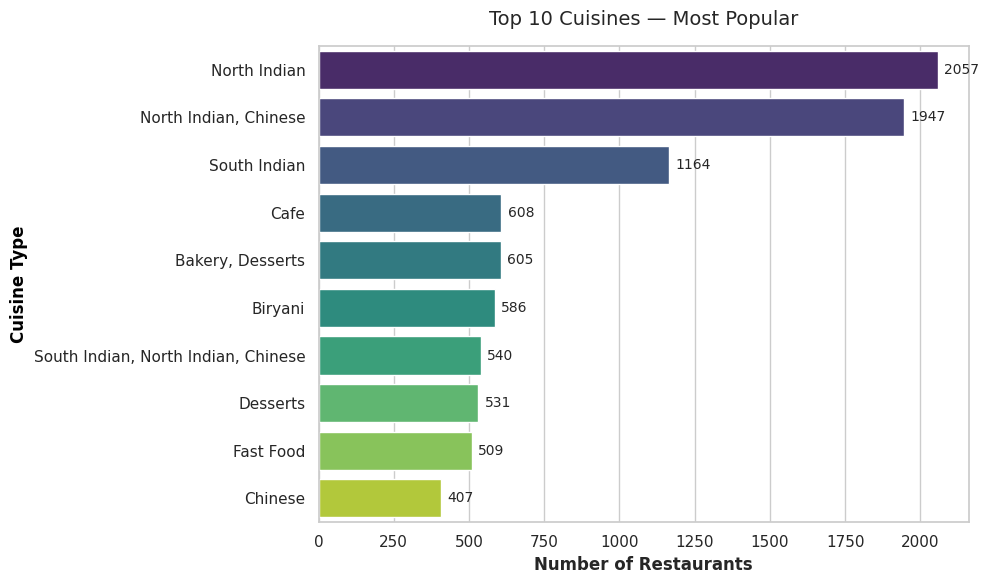

In [13]:
# Top 10 cuisines
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Horizontal barplot with a sleek colormap
ax = sns.barplot(
    x=Top_cusines.values,
    y=Top_cusines.index,
    palette="viridis"
)

# Annotate bars with their numeric values
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + max(Top_cusines.values)*0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{int(width)}',
        va='center',
        fontsize=10
    )

# Titles and labels
ax.set_title("Top 10 Cuisines — Most Popular", fontsize=14, pad=15)
ax.set_xlabel("Number of Restaurants", fontsize=12,fontweight='bold')
ax.set_ylabel('Cuisine Type', fontsize=12, fontweight='bold', color='black')


plt.tight_layout()
plt.show()


In [14]:
# Top 10 Average rating per location
Top_avg_rate=df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)

/tmp/ipython-input-1371840137.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


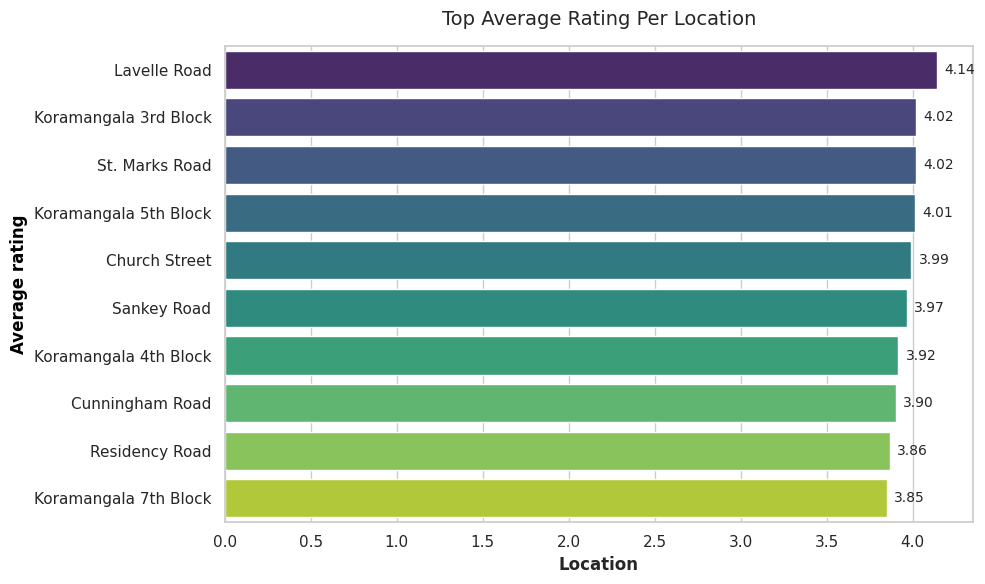

In [15]:
#Plot --Top 10 Average Rating per location

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Horizontal barplot with a sleek colormap
ax = sns.barplot(
    x=Top_avg_rate.values,
    y=Top_avg_rate.index,
    palette="viridis"
)

# Annotate bars with their numeric values
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + max(Top_avg_rate.values)*0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f}',
        va='center',
        fontsize=10
    )

# Titles and labels
ax.set_title("Top Average Rating Per Location", fontsize=14, pad=15)
ax.set_xlabel("Location", fontsize=12,fontweight='bold')
ax.set_ylabel('Average rating', fontsize=12, fontweight='bold', color='black')


plt.tight_layout()
plt.show()

In [16]:
#Cost for Two Distribution Plot
import plotly.express as px

fig = px.histogram(
    df,
    x='approx_cost(for two people)',
    nbins=30,
    title='Cost for Two Distribution',
    labels={'approx_cost(for two people)': 'Cost for Two'},
    template='plotly_white'
)
fig.show()


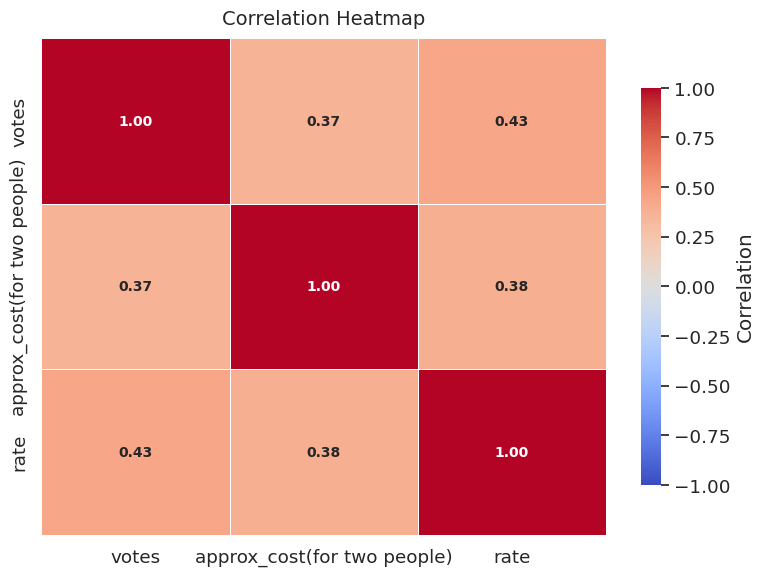

In [17]:
#Correlation between numeric features
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['votes', 'approx_cost(for two people)', 'rate']].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    linewidths=0.5, linecolor='white',
    annot_kws={"size":10, "weight":"bold"},
    cbar_kws={"shrink":0.8, "label":"Correlation"}
)

plt.title("Correlation Heatmap", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


In [18]:
df['phone'] = df['phone'].str.replace(r'\r\n|\n|\r', ', ', regex=True)

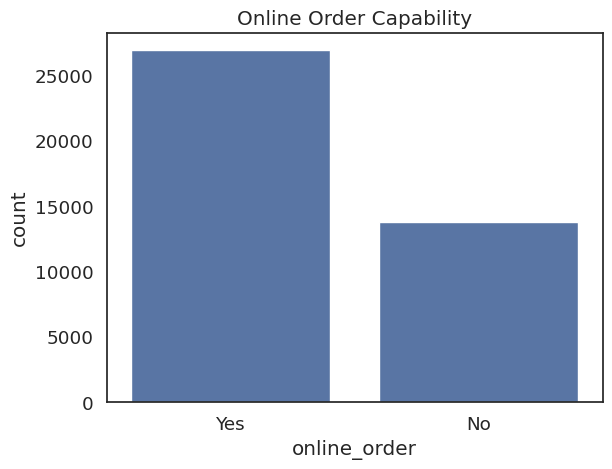

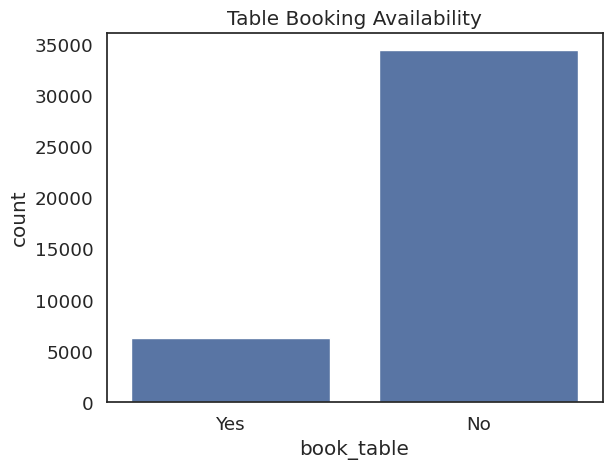

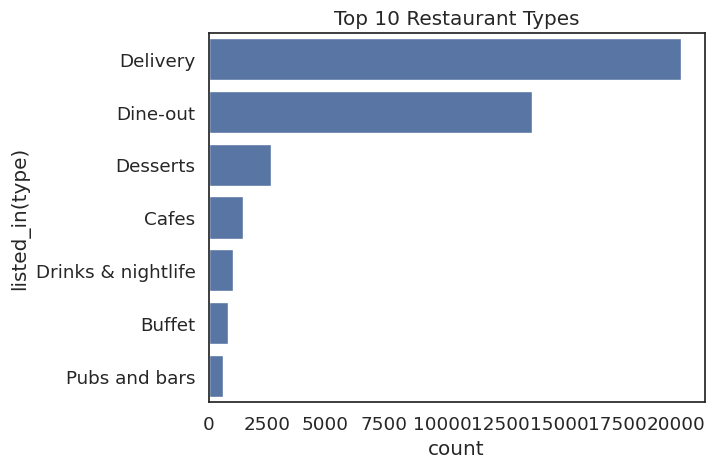

In [19]:
#Countplots for Categorical Features

# Online order facility distribution
sns.countplot(x='online_order', data=df)
plt.title('Online Order Capability')
plt.show()

# Table booking availability
sns.countplot(x='book_table', data=df)
plt.title('Table Booking Availability')
plt.show()

# Restaurant type categories
sns.countplot(y='listed_in(type)', data=df, order=df['listed_in(type)'].value_counts().index[:10])
plt.title('Top 10 Restaurant Types')
plt.show()


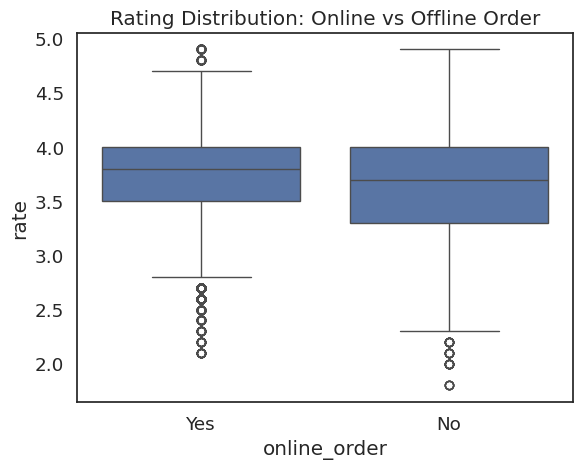

In [20]:
#Boxplots to Compare Ratings Across Categories
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Rating Distribution: Online vs Offline Order')
plt.show()


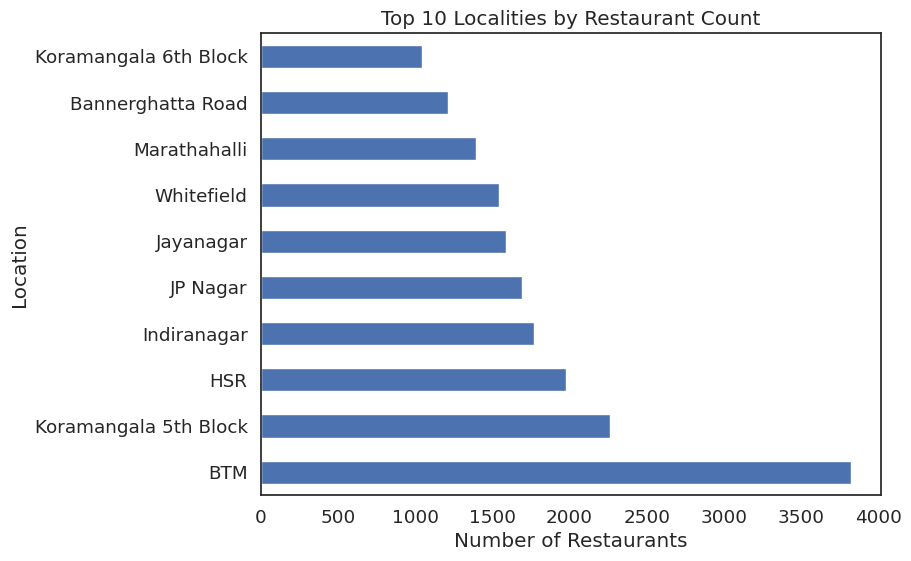

In [21]:
#Visualize the distribution of restaurants across localities
df['location'].value_counts().nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title('Top 10 Localities by Restaurant Count')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()


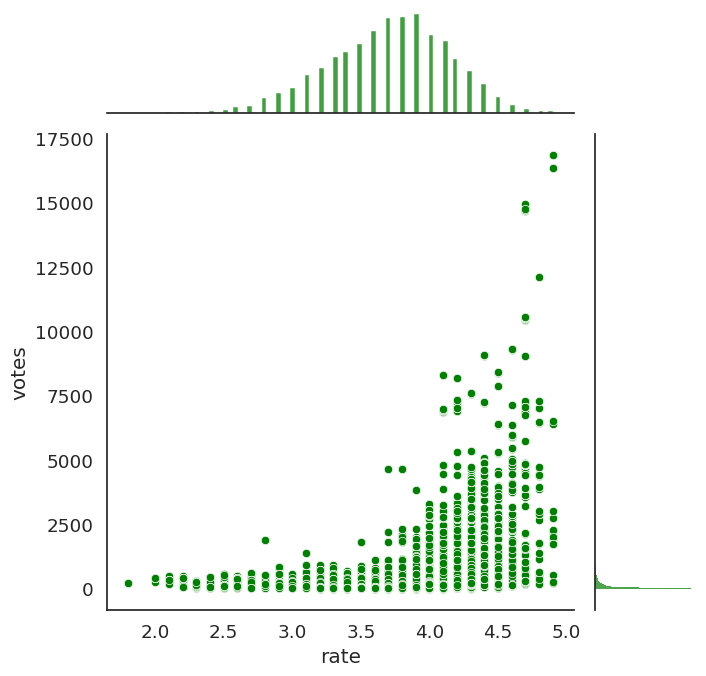

In [22]:
#Joint Plot: Rating vs Votes Distribution
sns.jointplot(x='rate', y='votes', data=df, height=7, ratio=4, color='green')
plt.title('Rating vs Votes', pad=40)
plt.show()


In [23]:
#Model BUilding ---
df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,"080 42297555, +91 9743772233",Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [24]:
df.drop(columns=['url','address','phone','menu_item','reviews_list','name'],inplace=True)

In [25]:
df

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51709,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
51715,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:

for i in df.select_dtypes(include='object'):
  df[i]=le.fit_transform(df[i])


In [28]:
df

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,1,24,1888,800,0,1
1,1,0,4.1,787,1,24,814,800,0,1
2,1,0,3.8,918,1,19,651,800,0,1
3,0,0,3.7,88,1,72,2213,300,0,1
4,0,0,3.8,166,4,24,1915,600,0,1
...,...,...,...,...,...,...,...,...,...,...
51709,0,0,3.7,34,88,25,1779,800,6,29
51711,0,0,2.5,81,88,25,100,800,6,29
51712,0,0,3.6,27,88,6,864,1500,6,29
51715,0,1,4.3,236,26,6,1204,2500,6,29


In [29]:
#Split the data into feature and target
X=df.drop(columns=['rate'])
y=df['rate']

In [30]:
X

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,775,1,24,1888,800,0,1
1,1,0,787,1,24,814,800,0,1
2,1,0,918,1,19,651,800,0,1
3,0,0,88,1,72,2213,300,0,1
4,0,0,166,4,24,1915,600,0,1
...,...,...,...,...,...,...,...,...,...
51709,0,0,34,88,25,1779,800,6,29
51711,0,0,81,88,25,100,800,6,29
51712,0,0,27,88,6,864,1500,6,29
51715,0,1,236,26,6,1204,2500,6,29


In [31]:
y

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
51709,3.7
51711,2.5
51712,3.6
51715,4.3


In [32]:
#Perform train-test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
#Model Building

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define models to compare
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("R²:", r2_score(y_test, preds))



=== LinearRegression ===
MAE: 0.28284318175190665
R²: 0.30162135600591966

=== DecisionTree ===
MAE: 0.048113787171295296
R²: 0.8563847555572752

=== RandomForest ===
MAE: 0.06369481035471503
R²: 0.9147200209748555

=== XGBoost ===
MAE: 0.15165111147293914
R²: 0.7499235174438111


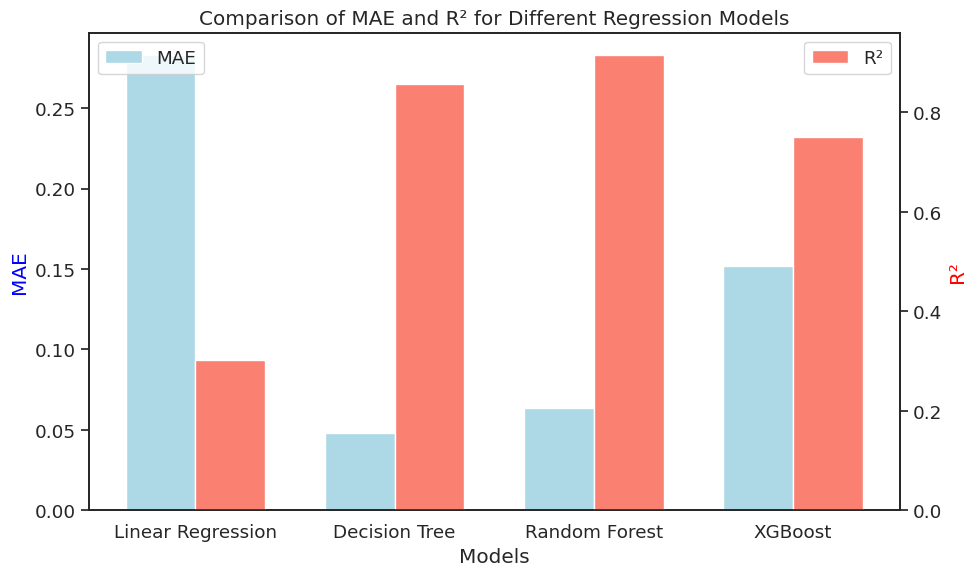

In [35]:
# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# MAE and R² values
mae = [0.28284318175190665, 0.048113787171295296, 0.06369481035471503, 0.15165111147293914]
r2 = [0.30162135600591966, 0.8563847555572752, 0.9147200209748555, 0.7499235174438111]

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar plots for MAE
bar_width = 0.35
index = np.arange(len(models))
bar1 = ax1.bar(index, mae, bar_width, label='MAE', color='lightblue')

# Create a second y-axis to plot R²
ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width, r2, bar_width, label='R²', color='salmon')

# Labeling
ax1.set_xlabel('Models')
ax1.set_ylabel('MAE', color='blue')
ax2.set_ylabel('R²', color='red')
ax1.set_title('Comparison of MAE and R² for Different Regression Models')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()
